In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime 
from datetime import date
from fbprophet import Prophet
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shovitraj/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
today = date.today()
today

datetime.date(2020, 7, 9)

In [3]:

start = datetime.datetime(1980,1,1)
end = today

[Check Index Names Here](https://finance.yahoo.com)

In [4]:
ticker=input("Enter index name:")

Enter index name:TRVN


In [28]:
title =  "{} Stock Price"

In [29]:
data = web.DataReader(ticker, 'yahoo', start, end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-31,7.25,6.35,7.11,6.50,3135700,6.50
2014-02-03,6.72,6.46,6.50,6.59,61100,6.59
2014-02-04,7.00,6.50,6.50,6.58,48600,6.58
2014-02-05,7.20,6.49,6.87,6.70,195400,6.70
2014-02-06,6.94,6.50,6.61,6.89,68500,6.89


In [30]:
#if you want to import as csv
data.to_csv(ticker+'.csv')

In [31]:
#reading csv
data = pd.read_csv(ticker+'.csv')

In [32]:
#checking if we have the same dataset as amazon.head()
data.head() 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-31,7.25,6.35,7.11,6.50,3135700,6.50
1,2014-02-03,6.72,6.46,6.50,6.59,61100,6.59
2,2014-02-04,7.00,6.50,6.50,6.58,48600,6.58
3,2014-02-05,7.20,6.49,6.87,6.70,195400,6.70
4,2014-02-06,6.94,6.50,6.61,6.89,68500,6.89


In [33]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1621.000000,1621.000000,1621.000000,1621.000000,1.621000e+03,1621.000000
mean,4.263213,3.976703,4.128294,4.116539,9.753928e+05,4.116539
std,3.114583,2.898249,3.013373,3.010205,2.315193e+06,3.010205
min,0.404000,0.382000,0.390000,0.389000,8.000000e+03,0.389000
25%,1.530000,1.430000,1.480000,1.480000,2.419000e+05,1.480000
50%,3.420000,3.260000,3.320000,3.320000,4.588000e+05,3.320000
75%,6.720000,6.310000,6.540000,6.510000,9.127000e+05,6.510000
max,13.570000,12.632000,13.130000,13.300000,4.019480e+07,13.300000


In [34]:
#3 day moving average
data['MAvg']=data.Close.rolling(365).mean()
#7 day moving averge
#data['MAvg7']=data.Close.rolling(7).mean()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close,MAvg
0,2014-01-31,7.25,6.35,7.11,6.50,3135700,6.50,NaN
1,2014-02-03,6.72,6.46,6.50,6.59,61100,6.59,NaN
2,2014-02-04,7.00,6.50,6.50,6.58,48600,6.58,NaN
3,2014-02-05,7.20,6.49,6.87,6.70,195400,6.70,NaN
4,2014-02-06,6.94,6.50,6.61,6.89,68500,6.89,NaN


In [35]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(x=data.Date, y=data.High, 
              mode ='lines',
              name='High', 
              line=dict(color='Red', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Low, 
                          mode='lines',
                          name='Low',
              line=dict(color='green', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Open,
                          mode='lines',
                          name='Open',
              line=dict(color='Blue', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Open, 
                          mode='lines',
                          name='Close',
              line=dict(color='purple', width=1)))

fig1.add_trace(go.Scatter(x=data.Date, y=data.MAvg, 
                          mode='lines',
                          name='Moving Avg',
              line=dict(color='orange', width=1)))

#fig1.add_trace(go.Scatter(x=data.Date, y=data.MAvg7, 
 #                         mode='lines',
  #                        name='Moving Avg 7 days',
   #           line=dict(color='lime', width=1)))
# Edit the layout
fig1.update_layout(title=print(title.format(ticker)),
                   xaxis_title='Date',
                   yaxis_title='Price in USD')

fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=6, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig1.show()


TRVN Stock Price


In [36]:
fig2=go.Figure()
fig2.add_trace(go.Scatter(x=data.Date, y=data.Volume, 
              mode ='lines',
              name='Volume', 
              line=dict(color='skyblue', width=1)))

fig2.update_layout(title=print(title.format(ticker)),
                   xaxis_title='Date',
                   yaxis_title='Volume')

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=6, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig2.show()

TRVN Stock Price


In [14]:
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [15]:

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


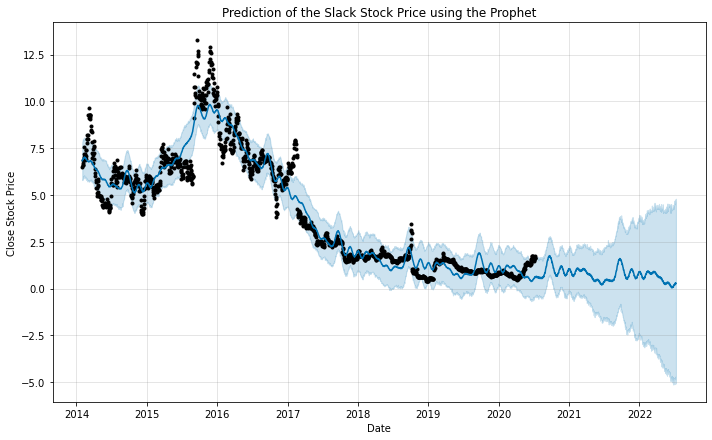

In [16]:
future = m.make_future_dataframe(periods=730) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Slack Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

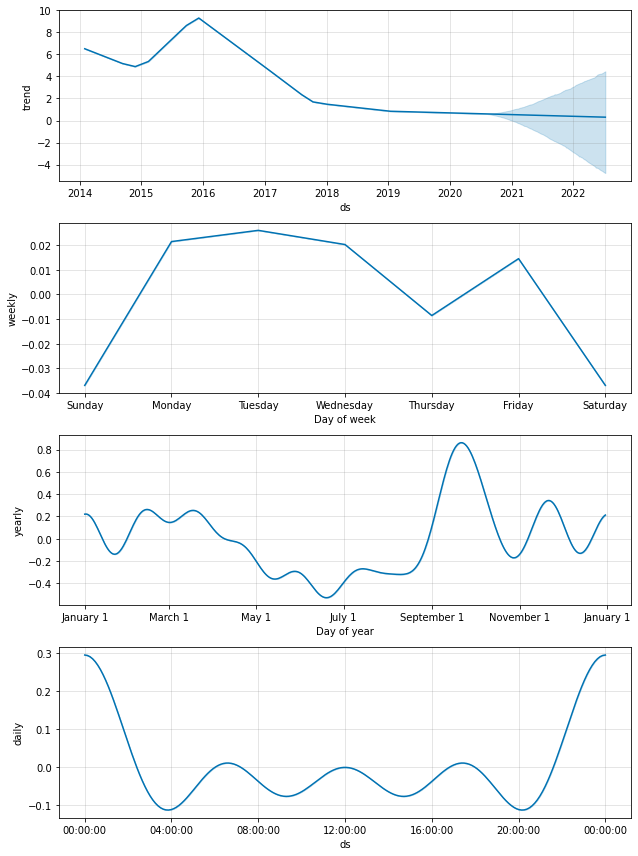

In [17]:
m.plot_components(prediction)
plt.show()